In [1]:
%matplotlib inline
import sys
sys.path.append('..')
from deep_bottleneck.eval_tools.experiment_loader import ExperimentLoader
from deep_bottleneck.eval_tools.utils import format_config, find_differing_config_keys
import matplotlib.pyplot as plt
from io import BytesIO

import pandas as pd
import numpy as np

Import the `ExperimentLoader` and instantiate it.

In [2]:
loader = ExperimentLoader()

Look up the experiment id in sacredboard. It is in the first column under `Id`.

In [3]:
experiment = loader.find_by_id(243)

You can also retrieve the config of the experiment.

In [4]:
config = experiment.config
config

{'activation_fn': 'tanh',
 'architecture': [10, 9, 7, 3, 3],
 'batch_size': 256,
 'calculate_mi_for': 'full_dataset',
 'callbacks': [],
 'dataset': 'datasets.harmonics',
 'discretization_range': 0.001,
 'epochs': 8000,
 'estimator': 'mi_estimator.upper',
 'learning_rate': 0.0004,
 'model': 'models.feedforward',
 'n_runs': 5,
 'optimizer': 'adam',
 'plotters': [['plotter.informationplane', []],
  ['plotter.snr', []],
  ['plotter.informationplane_movie', []],
  ['plotter.activations', []]],
 'regularization': False,
 'seed': 0}

The `Artifact` objects support a `.show()` and a `.save()` method. `.show()` will display the the figure, `.save()` will save the artifact to your filesystem. The viewer works with `png` images and `mp4` videos.

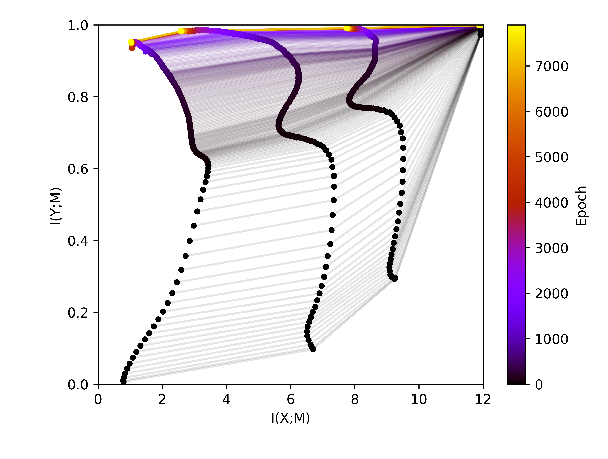

In [5]:
experiment.artifacts['infoplane'].show();

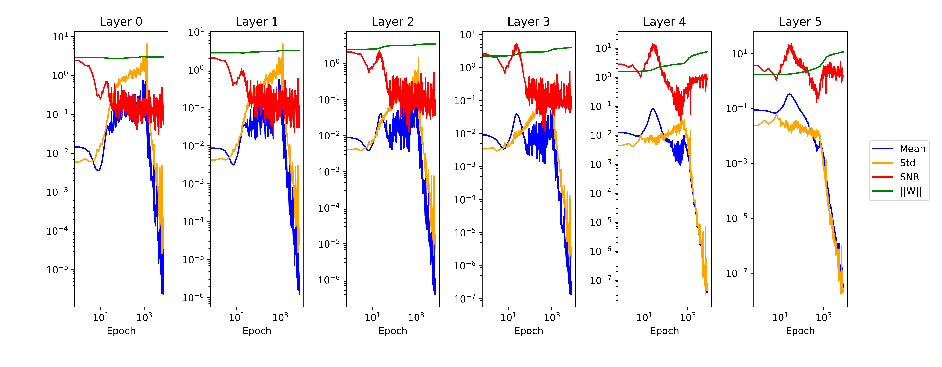

In [6]:
experiment.artifacts['snr'].show(figsize=(16,8));

In [7]:
experiment.artifacts['infoplane_movie'].show()

In [8]:
experiment.artifacts['information_measures'].show().head()

,epoch,layer,MI_XM,MI_YM,run
0,0,0,11.999952,0.999116,0
1,0,1,11.999793,0.999177,0
2,0,2,11.856066,0.948678,0
3,0,3,7.789100,0.167049,0
4,0,4,5.876998,0.075352,0


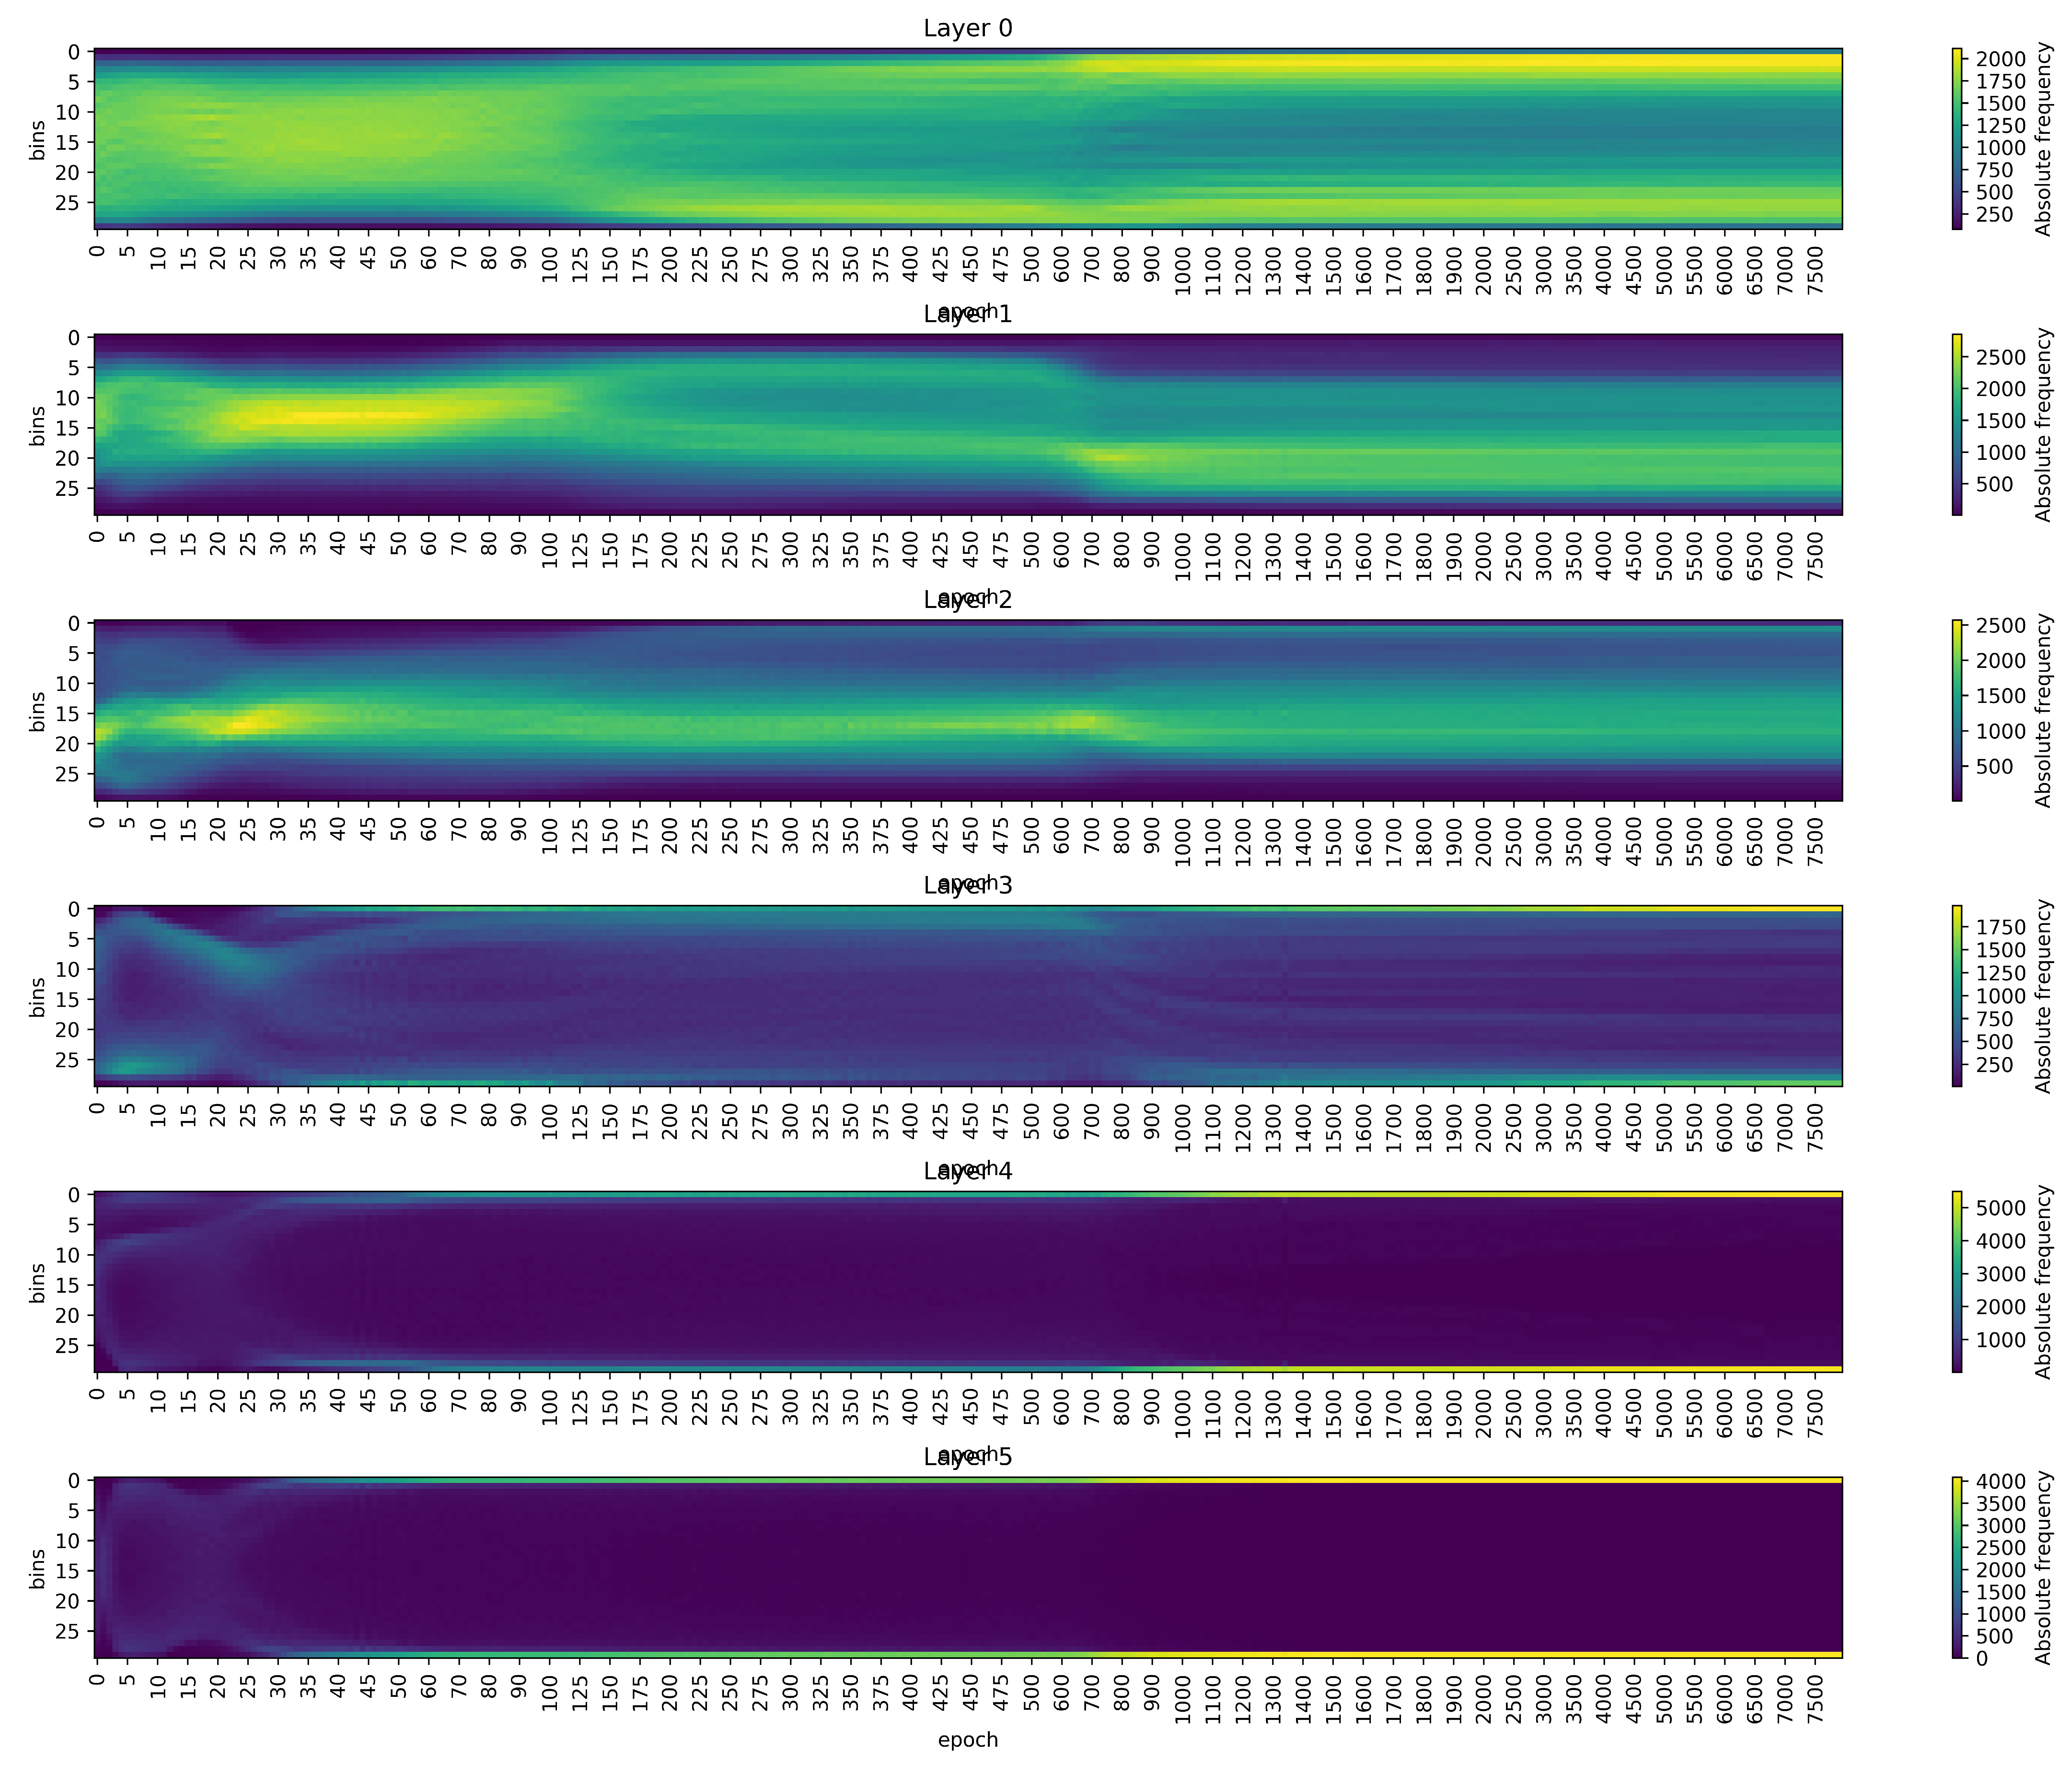

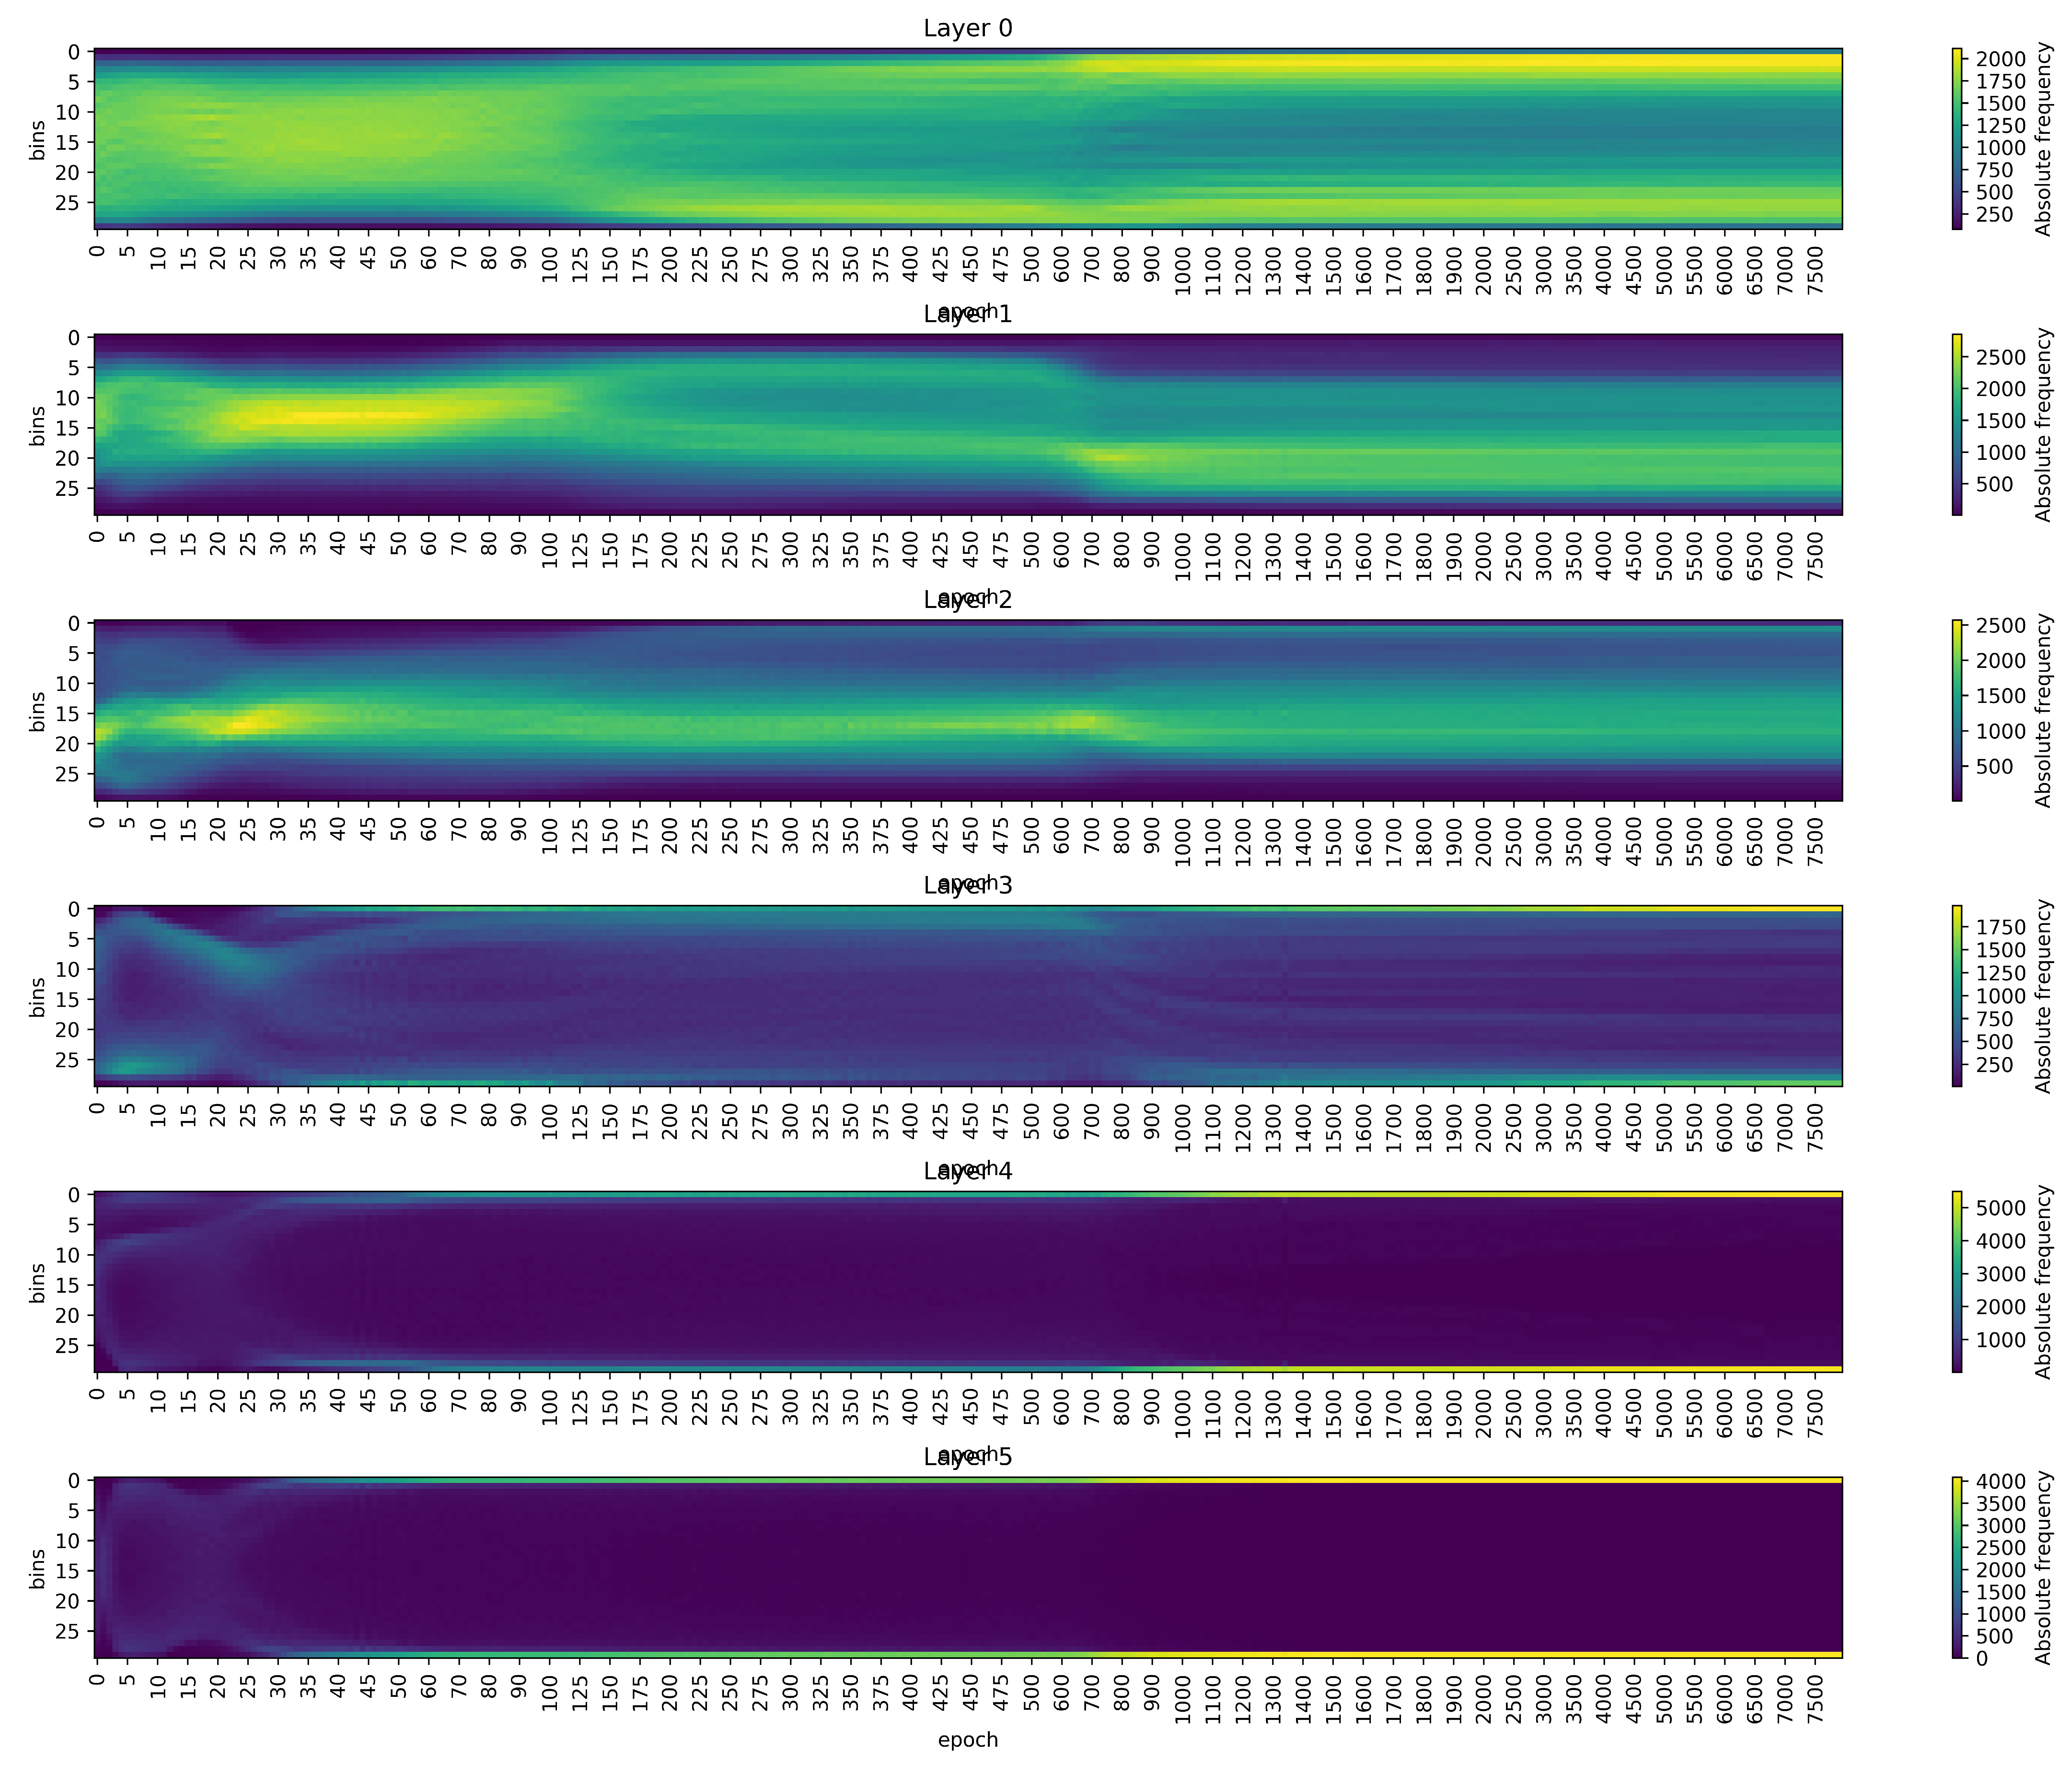

In [9]:
experiment.artifacts['activations'].show(figsize=(150,100))

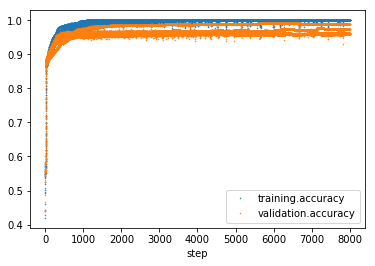

In [10]:
experiment.metrics['training.accuracy'].plot(linestyle='', marker='.', markersize=1)
experiment.metrics['validation.accuracy'].plot(linestyle='', marker='.', markersize=1)
plt.legend()
